In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_v5.csv')

In [4]:
df.shape

(3773, 19)

In [5]:
df.head()

,society,property_type,sector,price,price_per_sq,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,furnish_score,features_score,study room,servant room,store room,pooja room,others
0,m3m capital,flats,sector 113,2.00,12012.0,1665.0,3.0,3.0,2.0,24.0,na,under construction,unfurnished,mid,0.0,0.0,0.0,0.0,0.0
1,godrej oasis,flats,sector 88a,1.29,7800.0,1654.0,3.0,3.0,3.0,5.0,na,new property,unfurnished,mid,1.0,0.0,0.0,0.0,1.0
2,zara aavaas,flats,sector 104,0.20,6645.0,301.0,1.0,1.0,1.0,3.0,north-east,relative new,unfurnished,low,0.0,0.0,0.0,0.0,0.0
3,independent,houses,sector 8,0.32,7111.0,450.0,2.0,3.0,1.0,1.0,North-East,relative new,unfurnished,low,0.0,0.0,0.0,0.0,0.0
4,tulip violet,flats,sector 69,1.70,8445.0,2013.0,4.0,4.0,2.0,7.0,west,relative new,unfurnished,high,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df = df.drop(columns=['society' , 'facing' , 'price_per_sq'])

In [7]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [8]:
train_df.floorNum = train_df.floorNum.apply(categorize_floor)

In [9]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flats', 'houses'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'se

In [10]:
X_label.isnull().sum()

property_type     0
sector            0
area              0
bedRoom           0
bathroom          0
balcony           0
floorNum          0
agePossession     0
furnish_score     0
features_score    0
study room        0
servant room      0
store room        0
pooja room        0
others            0
dtype: int64

In [11]:
y_label

0        2.00
1        1.29
2        0.20
3        0.32
4        1.70
        ...  
3768    10.50
3769     1.38
3770     3.79
3771     1.84
3772     5.60
Name: price, Length: 3773, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

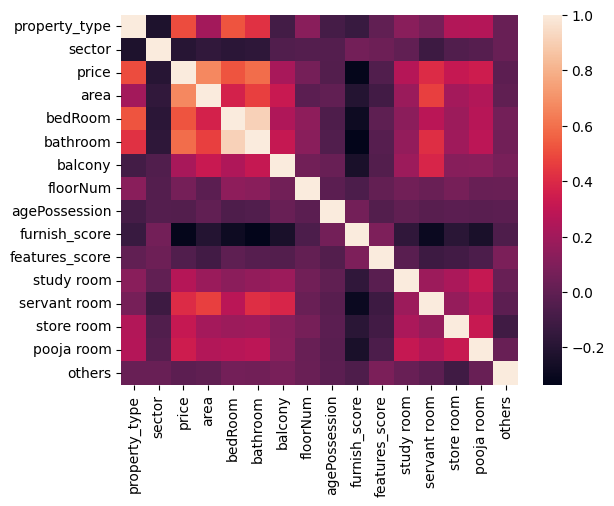

In [12]:
 sns.heatmap(data_label_encoded.corr())

In [13]:
corr = data_label_encoded.corr()['price']
corr = corr.drop('price').reset_index().rename(columns={
    'index' : 'feature',
    'price' : 'corr'
})
corr

,feature,corr
0,property_type,0.504781
1,sector,-0.198360
2,area,0.666921
3,bedRoom,0.525413
4,bathroom,0.592860
5,balcony,0.220479
6,floorNum,0.064506
7,agePossession,-0.044848
8,furnish_score,-0.321325
9,features_score,-0.050681


### Technique 2 - Random Forest Feature Importance

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

KeyboardInterrupt: 

### Technique 3 - Gradient Boosting Feature importances

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
2,area,0.549284
0,property_type,0.137049
1,sector,0.127003
4,bathroom,0.099775
11,servant room,0.034622
3,bedRoom,0.025081
8,furnish_score,0.011319
12,store room,0.006105
13,pooja room,0.003495
10,study room,0.002050


### Technique 4 - Permutation Importance

In [30]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
2,area,0.471243
0,property_type,0.243612
4,bathroom,0.204525
1,sector,0.182261
11,servant room,0.023933
3,bedRoom,0.008280
7,agePossession,0.006476
5,balcony,0.002374
9,features_score,0.001346
13,pooja room,0.000753


### Technique 5 - LASSO

In [31]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
2,area,1.310782
0,property_type,0.858742
4,bathroom,0.787120
10,study room,0.200168
12,store room,0.162863
13,pooja room,0.101609
11,servant room,0.090084
9,features_score,0.068017
6,floorNum,0.000000
7,agePossession,-0.000000


### Technique 6 - RFE

In [32]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
2,area,0.527648
0,property_type,0.125403
1,sector,0.124601
4,bathroom,0.085316
3,bedRoom,0.032258
11,servant room,0.031724
8,furnish_score,0.016650
7,agePossession,0.011863
9,features_score,0.009929
5,balcony,0.008677


### Technique 7 - Linear Regression Weights

In [33]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
2,area,1.310328
4,bathroom,0.909494
0,property_type,0.878670
10,study room,0.206469
12,store room,0.166334
13,pooja room,0.106662
11,servant room,0.087092
9,features_score,0.082297
6,floorNum,0.002612
7,agePossession,-0.005339


### Technique 8 - SHAP

In [34]:
!pip install shap

In [35]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-2.28259704e-01,  2.11100932e-01, -3.63455923e-01, ...,
        -6.86646138e-03, -9.72182285e-04,  4.24887422e-03],
       [-2.60848996e-01, -3.83898520e-01, -3.61516839e-01, ...,
        -4.47693634e-03, -1.18227416e-03, -1.12690539e-02],
       [-1.14704465e-01, -1.70540538e-01, -5.33316227e-01, ...,
        -3.28124035e-03, -5.52807317e-04,  6.48908202e-04],
       ...,
       [-1.43684384e+00, -3.14628980e-01,  2.80940934e+00, ...,
         6.97266482e-04, -1.32059553e-02,  6.38965522e-03],
       [-4.74470367e-01, -5.64926439e-01,  2.29791493e-01, ...,
        -3.75717660e-03, -3.50018089e-03,  2.81110710e-03],
       [-1.15172154e+00, -3.42890258e-01,  3.59923529e+00, ...,
        -1.00875671e-03,  1.65211537e-02, -1.80524585e-02]])

In [36]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
2,area,0.932146
0,property_type,0.562060
4,bathroom,0.441186
1,sector,0.441161
11,servant room,0.155085
3,bedRoom,0.067186
8,furnish_score,0.050959
7,agePossession,0.030071
9,features_score,0.027697
5,balcony,0.025056


In [42]:
final_fi_df = corr.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [43]:
final_fi_df


,corr,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
property_type,0.504781,0.126729,0.137049,0.243612,0.858742,0.125403,0.878670,0.562060
sector,-0.198360,0.127249,0.127003,0.182261,-0.044766,0.124601,-0.053931,0.441161
area,0.666921,0.528228,0.549284,0.471243,1.310782,0.527648,1.310328,0.932146
bedRoom,0.525413,0.029316,0.025081,0.008280,-0.280529,0.032258,-0.413686,0.067186
bathroom,0.592860,0.089554,0.099775,0.204525,0.787120,0.085316,0.909494,0.441186
balcony,0.220479,0.008601,0.001220,0.002374,-0.032558,0.008677,-0.049103,0.025056
floorNum,0.064506,0.006591,0.000192,-0.001190,0.000000,0.007838,0.002612,0.018970
agePossession,-0.044848,0.010834,0.001159,0.006476,-0.000000,0.011863,-0.005339,0.030071
furnish_score,-0.321325,0.016768,0.011319,-0.000153,-0.260483,0.016650,-0.267593,0.050959


In [44]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [45]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
area              0.470410
property_type     0.160793
sector            0.139312
bathroom          0.122380
servant room      0.034394
bedRoom           0.023590
furnish_score     0.012565
agePossession     0.008058
features_score    0.006519
balcony           0.005908
floorNum          0.004072
store room        0.003806
study room        0.003249
pooja room        0.003100
others            0.001843
dtype: float64

In [46]:
# to drop pooja room, study room, others
X_label

,property_type,sector,area,bedRoom,bathroom,balcony,floorNum,agePossession,furnish_score,features_score,study room,servant room,store room,pooja room,others
0,0.0,19.0,1665.0,3.0,3.0,2.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,101.0,1654.0,3.0,3.0,3.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0
2,0.0,8.0,301.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,92.0,450.0,2.0,3.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,80.0,2013.0,4.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,1.0,12.0,7331.0,5.0,4.0,3.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3769,0.0,80.0,1538.0,3.0,3.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3770,0.0,16.0,3830.0,5.0,5.0,3.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3771,0.0,99.0,2408.0,3.0,4.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [49]:
scores.mean()

0.8068939104729183

In [50]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [51]:
scores.mean()

0.8127215755114143

In [52]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [53]:
export_df.to_csv('gurgaon_properties_trial_data.csv', index=False)

In [348]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0,90,2.0,2.0,1,3,532.0,0.0,0.0,0.0,2,2,0.37
3550,1,12,5.0,5.0,4,3,6228.0,1.0,1.0,0.0,0,1,6.00
3551,0,23,1.0,1.0,1,0,665.0,0.0,0.0,1.0,2,2,0.60
3552,1,44,5.0,6.0,3,0,5490.0,1.0,1.0,0.0,2,2,15.50
